In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from fermat import Fermat
from sklearn.datasets import load_iris
import networkx as nx
import igraph as ig
import neo4j

In [21]:
X, y = load_iris(return_X_y=True, as_frame=True)
N = len(X)

In [22]:
G = nx.complete_graph(len(X))

In [31]:
nx.set_node_attributes(G, X.to_dict(orient="index"))
nx.set_node_attributes(G, y, name="y")

In [32]:
fermat = Fermat(alpha=2, path_method="FW")

In [33]:
dists = distance_matrix(X, X)
fermat.fit(dists)

Fermat(alpha=2, path_method='FW')

In [34]:
nx.set_edge_attributes(
    G,
    {
        (i, j): dists[i, j]
        for i in range(N)
        for j in range(i)
    },
    name="d",
)

In [35]:
G.edges[(0, 1)], dists[0, 1]

({'d': 0.5385164807134502}, 0.5385164807134502)

In [36]:
G.nodes[0]

{'sepal length (cm)': 5.1,
 'sepal width (cm)': 3.5,
 'petal length (cm)': 1.4,
 'petal width (cm)': 0.2,
 'y': 0}

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

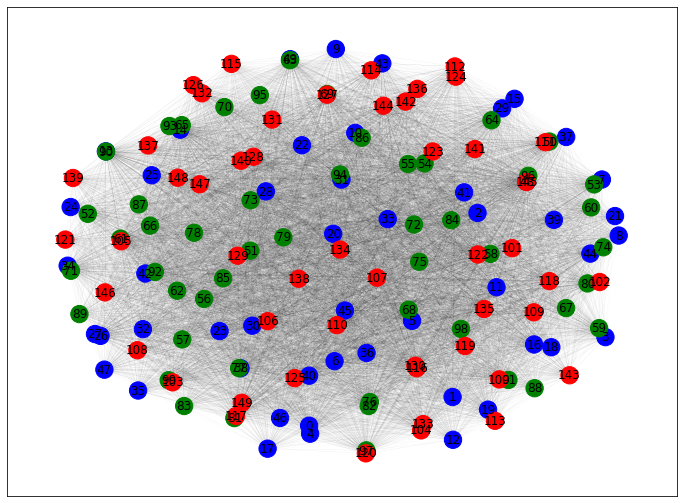

In [50]:
plt.figure(figsize=(12, 9))
nx.draw_networkx(
    G,
    width=1e-2 * np.sqrt([G.edges[e].get("d") for e in G.edges]),
    node_color=[
        {0: "blue", 1: "green", 2: "red"}[G.nodes[n].get("y")] for n in G.nodes
    ],
)
